This notebook contains a collection of goodness-of-fit tests

In [1]:
import sys
sys.path.append('..')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
from tqdm import tqdm
from sklearn.metrics import *
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")
tqdm.pandas()


%matplotlib inline

In [2]:
# Run all models
from src.models import *

balancing...
repairs: 27.73092578545258%, non-repairs: 72.26907421454743%
Fitting 1-layer hierarchical Bayesian models...


Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [ppt_sig, mu_c, sigma_c, similarity_c, income_mu, ppt, c]


Sampling 3 chains for 100 tune and 100 draw iterations (300 + 300 draws total) took 1379 seconds.
Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [hydr_sig, mu_c, sigma_c, similarity_c, age_mu, income_mu, hydr, c]


Sampling 3 chains for 100 tune and 100 draw iterations (300 + 300 draws total) took 1635 seconds.
Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [mu_c, sigma_c, similarity_c, slope, c]


Sampling 3 chains for 100 tune and 100 draw iterations (300 + 300 draws total) took 2911 seconds.
Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [hse_sig, mu_c, sigma_c, similarity_c, age_mu, income_mu, hse, c]


Sampling 3 chains for 100 tune and 100 draw iterations (300 + 300 draws total) took 1335 seconds.
Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [ppt_sig, hydr_sig, hse_sig, mu_c, sigma_c, ppt_similarity_c, hydr_similarity_c, slope_similarity_c, hse_similarity_c, ppt_income_mu, hydr_age_mu, hydr_income_mu, hse_age_mu, hse_income_mu, ppt, hydr, hse, slope, c]


Sampling 3 chains for 100 tune and 100 draw iterations (300 + 300 draws total) took 5046 seconds.
Only 100 samples in chain.


Fitting pooled Bayesian models...


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [ppt_mu, ppt_sig, mu_c, sigma_c, ppt, c]


Sampling 3 chains for 100 tune and 100 draw iterations (300 + 300 draws total) took 1349 seconds.
Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [ppt_mu, hydr_sig, mu_c, sigma_c, hydr, c]


Sampling 3 chains for 100 tune and 100 draw iterations (300 + 300 draws total) took 1829 seconds.
Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [slope_beta, mu_c, sigma_c, slope, c]


Sampling 3 chains for 100 tune and 100 draw iterations (300 + 300 draws total) took 18350 seconds.
Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [hse_sig, mu_c, sigma_c, hse, c]


Sampling 3 chains for 100 tune and 100 draw iterations (300 + 300 draws total) took 1067 seconds.
Only 100 samples in chain.


fitting full pooled Bayesian model...


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [ppt_mu, ppt_sig, hydr_mu, hydr_sig, hse_sig, slope_beta, mu_c, sigma_c, ppt, hydr, hse, slope, c]


Sampling 3 chains for 100 tune and 100 draw iterations (300 + 300 draws total) took 1623 seconds.


# Goodness-of-Fit Analyses

In general, GoF tests have the following form: $fit - penalty$ (where lower values mean imply better predictive models)

Where the $fit$ typically measures how uncertain the prediction is to variation in parameters: $log(\frac{1}{N}\sum_{i=1}^NP(y|\hat{\theta_i}))$. If for all $\theta_i$, the probability of predicting y is always 1 (certain), then $log(1) = 0$

Where the $penalty$ typically measures the variance of the fitted posterior: $Var_{i=1}^nlog(P(y|\hat{\theta_i}))$

Models summary:
1. _Water model_: __distance to water bodies, annual maxima precipitation__
2. _Soil model_: distance to water bodies, annual maxima precipitation, __soil hydraulic conductivity__
3. _Socio model_: distance to water bodies, annual maxima precipitation, soil hydraulic conductivity, __median housing value__
4. _Topo model_: distance to water bodies, annual maxima precipitation, soil hydraulic conductivity, median housing value, __flow accumulation, elevation__

## 1. Widely Applicable Information Criterion (WAIC)
$fit = \sum_{i=1}^s-2log(\frac{1}{n}\sum_{j=1}^nP(y_i|\hat{\theta_j}))$ (for all points $s$)

$penalty = \sum_{i=1}^sVar_{j=1}^nlog(P(y_i|\hat{\theta_j}))$ (for all points $s$)

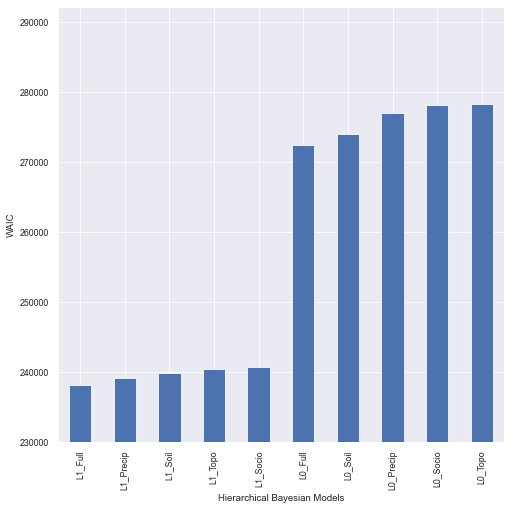

In [3]:
waic_df = pm.compare(traces_dict, ic='WAIC', scale='deviance')
waic_df.reset_index(inplace=True)

# Plot WAIC (lower is better)
f, ax = plt.subplots(figsize=(8,8))
waic_df['elpd_waic'].plot.bar(ax=ax)
ax.set_ylim(230000)
ax.set_xticks(range(len(waic_df)))
ax.set_xticklabels(waic_df['index'].values, rotation='vertical')
# ax.set_title('WAIC GoF')
ax.set_xlabel('Hierarchical Bayesian Models')
ax.set_ylabel('WAIC')
f.savefig('../docs/waic_line.pdf', dpi=300)

In [4]:
waic_df

,index,rank,elpd_waic,p_waic,elpd_diff,weight,se,dse,warning,scale
0,L1_Full,0,238075.857628,417.762098,0.000000,9.529245e-01,365.893668,0.000000,True,deviance
1,L1_Precip,1,239063.677245,284.867141,987.819617,1.236722e-11,362.881116,61.683964,False,deviance
2,L1_Soil,2,239805.180425,275.031457,1729.322797,8.565947e-03,358.880986,85.360419,True,deviance
3,L1_Topo,3,240446.376841,176.551120,2370.519213,3.850958e-02,356.669813,100.116302,True,deviance
4,L1_Socio,4,240731.249155,152.841496,2655.391527,1.042909e-11,355.803483,104.332727,False,deviance
5,L0_Full,5,272449.068580,4.342977,34373.210952,7.401933e-12,153.162393,342.693040,False,deviance
6,L0_Soil,6,274073.971078,2.118536,35998.113450,6.113219e-12,132.790935,349.069343,False,deviance
7,L0_Precip,7,276997.959680,2.089692,38922.102052,4.911899e-12,81.731527,360.572967,False,deviance
8,L0_Socio,8,278173.953065,2.252081,40098.095437,4.773139e-12,43.293768,364.310722,False,deviance
9,L0_Topo,9,278245.984657,1.087558,40170.127029,0.000000e+00,39.937537,364.560338,False,deviance


Text(0, 0.5, 'WAIC relative error (%)')

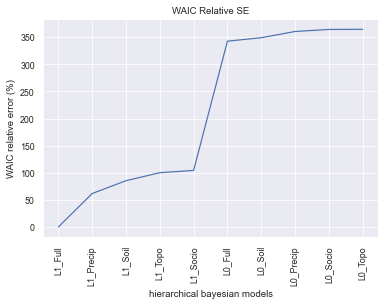

In [5]:
# Plot WAIC relative SE
ax = waic_df['dse'].plot()

ax.set_xticks(range(len(waic_df)))
ax.set_xticklabels(waic_df['index'].values, rotation='vertical')
ax.set_title('WAIC Relative SE')
ax.set_xlabel('hierarchical bayesian models')
ax.set_ylabel('WAIC relative error (%)')

In [6]:
# Prettier graph: sort in the right order TODO: cleaner function to sort
l1_sorter = ['L1_Precip', 'L1_Soil', 'L1_Topo', 'L1_Socio', 'L1_Full']
l1 = waic_df[waic_df['index'].str[:2] == 'L1'].set_index('index')
l1 = l1.loc[l1_sorter]
l1_waic, l1_dse = l1.elpd_waic.values, l1.dse.values

l0_sorter = ['L0_Precip', 'L0_Soil', 'L0_Topo', 'L0_Socio', 'L0_Full']
l0 = waic_df[waic_df['index'].str[:2] == 'L0'].set_index('index')
l0 = l0.loc[l0_sorter]
l0_waic, l0_dse = l0.elpd_waic.values, l0.dse.values

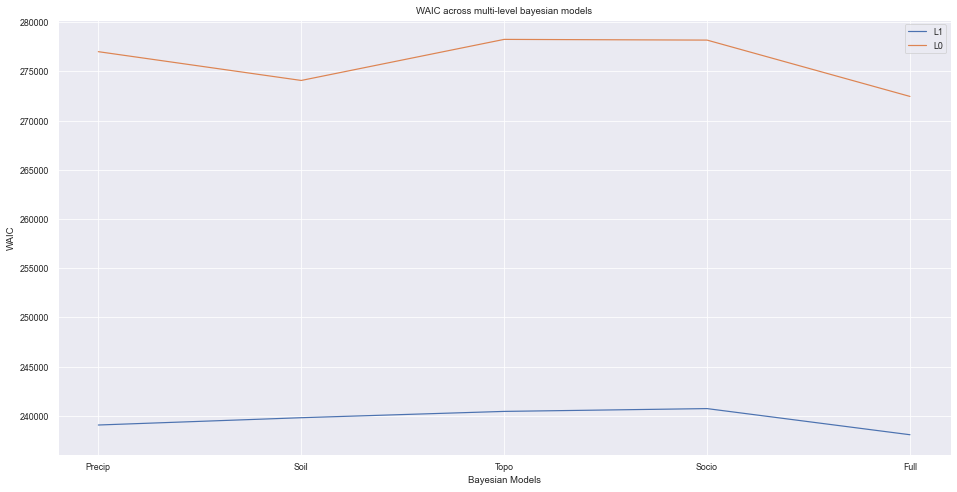

In [7]:
# WAIC
x = ['Precip', 'Soil', 'Topo', 'Socio', 'Full']
f, ax = plt.subplots(figsize=(16,8))
# ax.plot(x, l2_waic, label='L2')
ax.plot(x, l1_waic, label='L1')
ax.plot(x, l0_waic, label='L0')
ax.set_title('WAIC across multi-level bayesian models')
ax.set_xlabel('Bayesian Models')
ax.set_ylabel('WAIC')
ax.legend()

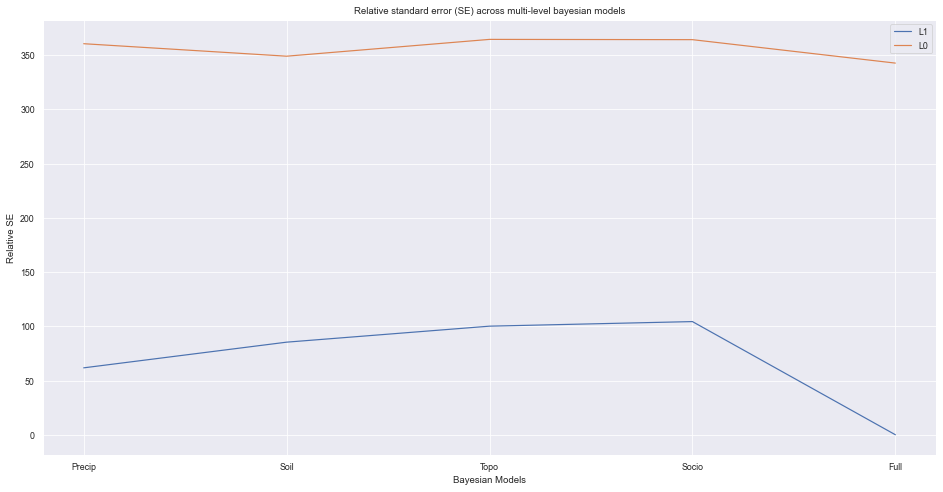

In [8]:
# Uncertainty (dSE)
x = ['Precip', 'Soil', 'Topo', 'Socio', 'Full']
f, ax = plt.subplots(figsize=(16,8))
# ax.plot(x, l2_dse, label='L2')
ax.plot(x, l1_dse, label='L1')
ax.plot(x, l0_dse, label='L0')
ax.set_title('Relative standard error (SE) across multi-level bayesian models')
ax.set_xlabel('Bayesian Models')
ax.set_ylabel('Relative SE')
ax.legend()

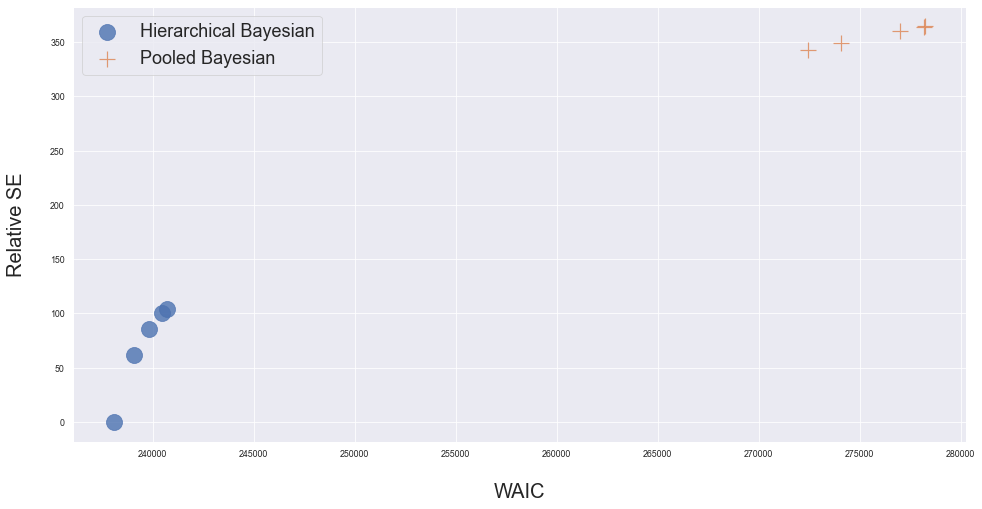

In [9]:
# SE vs WAIC
f, ax = plt.subplots(figsize=(16,8))
ax.scatter(l1_waic, l1_dse, label='Hierarchical Bayesian', marker='o', alpha=0.8, s=256)
ax.scatter(l0_waic, l0_dse, label='Pooled Bayesian', marker='+', alpha=0.8, s=256)
ax.set_xlabel('WAIC', labelpad= 24, fontsize=20)
ax.set_ylabel('Relative SE', labelpad=24, fontsize=20)
ax.legend(fontsize=18)
f.savefig('../docs/waic_se_all.pdf', dpi=300, bbox_inches='tight')

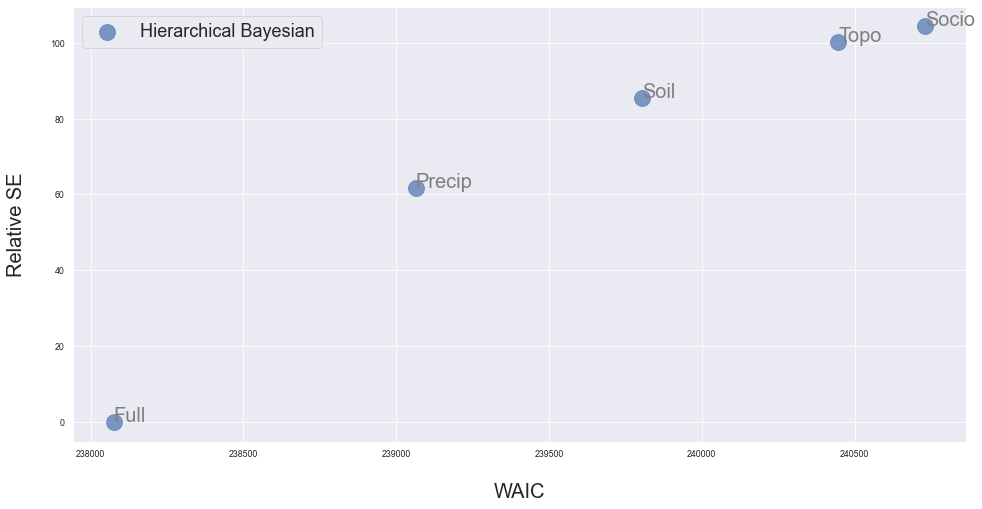

In [10]:
# SE vs WAIC (without l0)
x = ['Precip', 'Soil', 'Topo', 'Socio', 'Full']
f, ax = plt.subplots(figsize=(16,8))
ax.scatter(l1_waic, l1_dse, label='Hierarchical Bayesian', marker='o', alpha=0.7, s=256)
# ax.scatter(l0_waic, l0_dse, label='Pooled Bayesian', marker='+', alpha=0.7, s=256)
ax.set_xlabel('WAIC', labelpad=24, fontsize=20)
ax.set_ylabel('Relative SE', labelpad=24, fontsize=20)

for i, txt in enumerate(x):
    ax.annotate(txt, (l1_waic[i] - 0.5, l1_dse[i] + 0.2), fontsize=20, color='gray')
ax.legend(fontsize=18)
f.savefig('../docs/waic_se_l12.pdf', dpi=300, bbox_inches='tight')